In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r"D:\DL_project\CreditCardFraudProject\data\CreditCardData_Cleaned.csv"
df = pd.read_csv(file_path)

In [3]:
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (14997, 39)


,Day of Week,Time,Type of Card,Amount,Gender,Age,Fraud,Entry Mode_PIN,Entry Mode_Tap,Type of Transaction_Online,...,Country of Residence_Russia,Country of Residence_USA,Country of Residence_United Kingdom,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS
0,2,19,1,21.0,1,46.1,0,False,False,True,...,False,False,True,False,False,False,True,False,False,False
1,1,0,1,6.0,1,52.0,1,False,False,True,...,False,False,True,False,False,False,False,True,False,False
2,1,9,0,7.0,1,43.9,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,2,20,1,17.0,0,31.5,1,False,False,True,...,False,False,True,False,False,False,False,False,False,False
4,2,11,1,27.0,0,33.8,1,False,False,True,...,False,False,True,True,False,False,False,False,False,False


 Training LSTM Model...
Epoch 1/20


d:\DL_project\CreditCardFraudProject\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8812 - loss: 0.3466 - val_accuracy: 0.9325 - val_loss: 0.1630
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9367 - loss: 0.1699 - val_accuracy: 0.9442 - val_loss: 0.1406
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9416 - loss: 0.1492 - val_accuracy: 0.9458 - val_loss: 0.1307
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9460 - loss: 0.1387 - val_accuracy: 0.9517 - val_loss: 0.1229
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9506 - loss: 0.1289 - val_accuracy: 0.9517 - val_loss: 0.1181
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9527 - loss: 0.1230 - val_accuracy: 0.9517 - val_loss: 0.1179
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9534 - loss: 0.1195 - val_accuracy: 0.9525 - val_loss: 0.1116
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9530 - loss: 0.1166 - val_accuracy: 0.9533 - val_

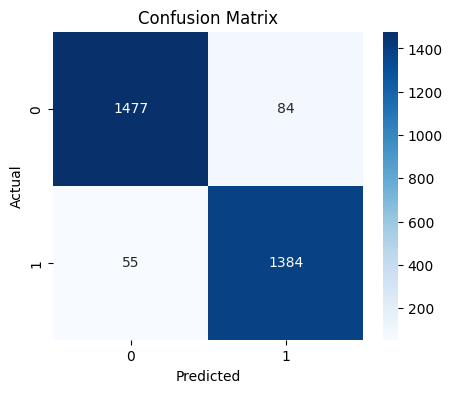

In [9]:
X = df.drop("Fraud", axis=1).values
y = df["Fraud"].values

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 4️ Reshape for LSTM (samples, timesteps, features)

# Treat each feature vector as a sequence of length 1
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


# 5️ Build LSTM Model

lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


# 6️ Train LSTM Model

print(" Training LSTM Model...")
history = lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=64, validation_split=0.1, verbose=1)


# 7️ Predictions

y_pred_prob = lstm_model.predict(X_test_lstm)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()


# 8️ Evaluate Model

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


print("\n LSTM Model Performance:")
print(f"Accuracy : {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall   : {recall*100:.2f}%")
print(f"F1-Score : {f1*100:.2f}%")
print(f"ROC-AUC  : {roc_auc:.3f}")


# 9️ Optional: Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

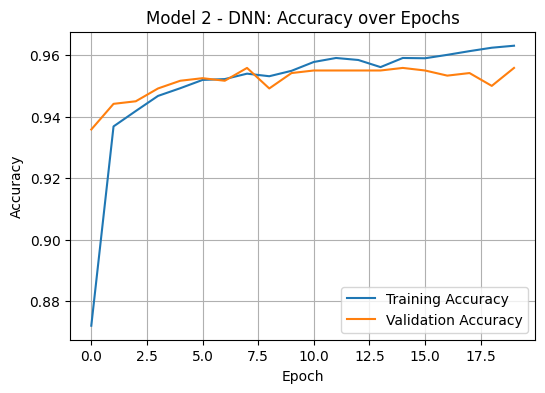

In [8]:
# Plot training & validation accuracy values
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2 - DNN: Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()